Linear Regression

In [1]:
import numpy as np

In [ ]:
# def linearRegression(X, W, b):
#   return np.dot(X, W) + b

In [ ]:
# def gradientDescent(X, y, W, b, alpha):
#   m = len(y)
#   y_pred = linearRegression(X, W, b)
#   dW = (1/m) * np.dot(X.T, (y_pred - y))
#   db = (1/m) * np.sum(y_pred - y)
#   W = W - alpha * dW
#   b = b - alpha * db
#   return W, b

In [9]:
class LinearRegression:
  def __init__(self, lr=0.01, epochs=1000):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def mean_squared_error(self, y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.epochs):
      y_pred = np.dot(X, self.weights) + self.bias

      # gradient descent
      # compute gradient
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)
      #update weights
      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

      # Print cost every 100 epochs
      if _ % 100 == 0:
        cost = self.mean_squared_error(y, y_pred)
        print(f'Epoch {_}/{self.epochs} - Cost: {cost}')

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  def printWeights(self):
    print(self.weights )
    print(self.bias)



In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Generate sample data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Display the shapes of the generated data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (80, 1)
Shape of y_train: (80,)
Shape of X_test: (20, 1)
Shape of y_test: (20,)


In [20]:
linearRegression = LinearRegression(epochs=1200);
linearRegression.fit(X_train, y_train);
linearRegression.printWeights();

linearRegression.predict(X_test)
print(linearRegression.mean_squared_error(y_test, linearRegression.predict(X_test)))

Epoch 0/1200 - Cost: 5986.801389148531
Epoch 100/1200 - Cost: 1032.13422469407
Epoch 200/1200 - Cost: 384.073518788946
Epoch 300/1200 - Cost: 299.1972923470613
Epoch 400/1200 - Cost: 288.06619597109545
Epoch 500/1200 - Cost: 286.6044148547207
Epoch 600/1200 - Cost: 286.41218145033207
Epoch 700/1200 - Cost: 286.38686600822047
Epoch 800/1200 - Cost: 286.38352745163223
Epoch 900/1200 - Cost: 286.3830865382776
Epoch 1000/1200 - Cost: 286.383028224387
Epoch 1100/1200 - Cost: 286.3830205008502
[75.05896608]
-0.14232719686518414
305.7738941865827


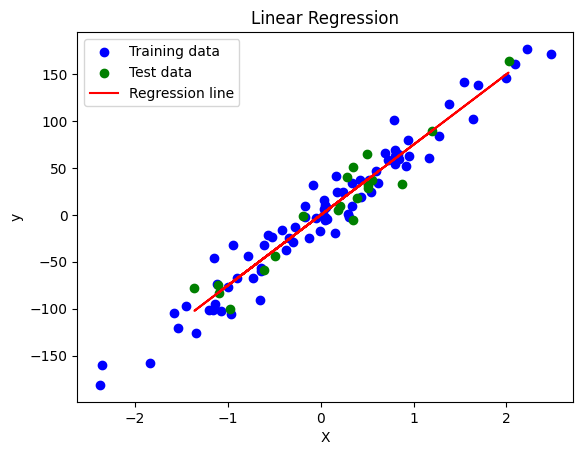

In [21]:
import matplotlib.pyplot as plt

# Plot the data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, linearRegression.predict(X_test), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Logistic Regressions


In [32]:
class LogisticRegression:
  def __init__(self, lr=0.01, epochs=1000):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def sigmoid(self, x):
    # Clip values to prevent overflow -1715.7162769634233
    # /tmp/ipython-input-1051880132.py:9: RuntimeWarning: overflow encountered in exp
    x = np.clip(x, -500, 500)
    return 1/(1 + np.exp(-x))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.epochs):
      linear_model = np.dot(X, self.weights) + self.bias
      y_pred = self.sigmoid(linear_model)

      # gradient descent
      # compute gradient
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)
      #update weights
      self.weights -= self.lr*dw
      self.bias -= self.lr*db

      # Print cost every 100 epochs
      if _ % 100 == 0:
        cost = self.binary_cross_entropy(y, y_pred)
        print(f'Epoch {_}/{self.epochs} - Cost: {cost}')

  def predict_pob(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    return self.sigmoid(linear_model)

  def predict(self, X, threashold = 0.5):
    y_pred = self.predict_pob(X)
    return [1 if i > threashold else 0 for i in y_pred]

  #cost function
  # mse not used as it produces wiggly curve
  def binary_cross_entropy(self, y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate sample classification data
X_cls, y_cls = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=1234)

# Display the shapes of the generated data
print("Shape of X_train_cls:", X_train_cls.shape)
print("Shape of y_train_cls:", y_train_cls.shape)
print("Shape of X_test_cls:", X_test_cls.shape)
print("Shape of y_test_cls:", y_test_cls.shape)

Shape of X_train_cls: (80, 2)
Shape of y_train_cls: (80,)
Shape of X_test_cls: (20, 2)
Shape of y_test_cls: (20,)


In [45]:
logisticRegression = LogisticRegression(epochs=6500);
logisticRegression.fit(X_train_cls, y_train_cls);
# logisticRegression.printWeights();

y_pred_cls = logisticRegression.predict_pob(X_test_cls)
print(logisticRegression.binary_cross_entropy(y_test_cls, y_pred_cls))

Epoch 0/6500 - Cost: 0.6931471805599453
Epoch 100/6500 - Cost: 0.46377137374960586
Epoch 200/6500 - Cost: 0.36159855478753655
Epoch 300/6500 - Cost: 0.30366728341303606
Epoch 400/6500 - Cost: 0.2656805863756731
Epoch 500/6500 - Cost: 0.2384964141486569
Epoch 600/6500 - Cost: 0.21790320178766054
Epoch 700/6500 - Cost: 0.20166860627062277
Epoch 800/6500 - Cost: 0.18848659025932485
Epoch 900/6500 - Cost: 0.17753598997838818
Epoch 1000/6500 - Cost: 0.1682716090098923
Epoch 1100/6500 - Cost: 0.16031575720347696
Epoch 1200/6500 - Cost: 0.1533977098616023
Epoch 1300/6500 - Cost: 0.1473179037478356
Epoch 1400/6500 - Cost: 0.1419257422856816
Epoch 1500/6500 - Cost: 0.13710529020510648
Epoch 1600/6500 - Cost: 0.1327657458273252
Epoch 1700/6500 - Cost: 0.12883491529784777
Epoch 1800/6500 - Cost: 0.12525463356600292
Epoch 1900/6500 - Cost: 0.12197748281122703
Epoch 2000/6500 - Cost: 0.11896439650101973
Epoch 2100/6500 - Cost: 0.11618288086702341
Epoch 2200/6500 - Cost: 0.11360567496911886
Epoch 23

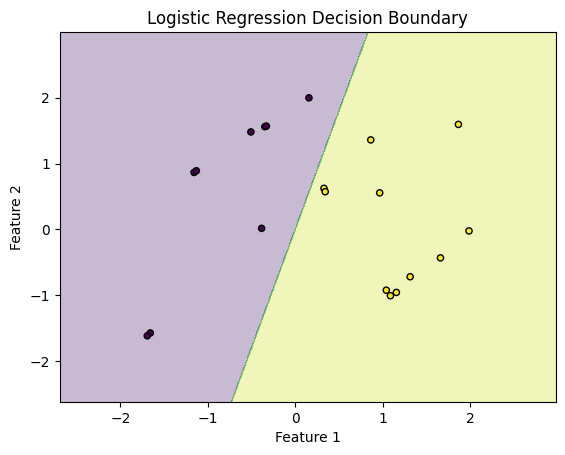

In [46]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X_test_cls, y_test_cls, logisticRegression)

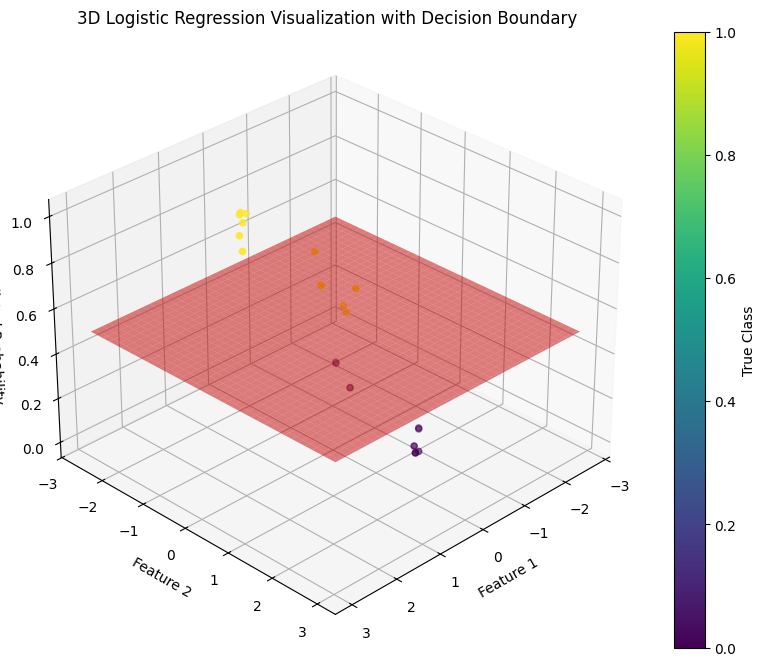

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Predict probabilities for the test data
y_prob_test = logisticRegression.predict_pob(X_test_cls)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of test data with predicted probability as the z-axis
scatter = ax.scatter(X_test_cls[:, 0], X_test_cls[:, 1], y_prob_test, c=y_test_cls, cmap='viridis', marker='o')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Probability')
ax.set_title('3D Logistic Regression Visualization with Decision Boundary')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('True Class')

# Plot the decision boundary (plane where probability is 0.5)
x_min, x_max = X_test_cls[:, 0].min() - 1, X_test_cls[:, 0].max() + 1
y_min, y_max = X_test_cls[:, 1].min() - 1, X_test_cls[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
zz = np.full(xx.shape, 0.5) # Decision boundary at probability 0.5

ax.plot_surface(xx, yy, zz, color='red', alpha=0.5, label='Decision Boundary')

# Adjust the viewing angle for better visibility
ax.view_init(elev=30, azim=45)

plt.show()